The objective of the current small extend is to determine to what extend furnished data has bias between **allergens** and **non-allergens** proteins.

# Imports

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/pierre/riken/io/')
import pandas as pd
import seaborn as sns

from riken.protein_io import reader
sns.set()

In [2]:
data_path = '/home/pierre/riken/data/riken_data/complete_from_xlsx.tsv'

df = pd.read_csv(data_path, sep='\t')
df[['is_allergenic','sequences','genre','species']].sample(5)

,is_allergenic,sequences,genre,species
3635,False,MRGYLLAIFLSAVFLYYVLHCILWRTNDYGVTPMEMKQRNKIRSCL...,bos,taurus
1397,True,MAFAGILADADCAAAVKACEAAESFSYKAFFAKCGLSGKSADDIKK...,gadus,morhua
8607,False,MAGRGGAARPNGPAAGNKICQFKLVLLGESAVGKSSLVLRFVKGQF...,bos,taurus
8813,False,MPNLWFLLFLGLVAAMQLLLLLFLLLFFLVYWDHFECSCTGLPF,bovine,papillomavirus
5014,False,MRELTKRQSEIYNYIKQVVQMKGYPPSVREIGEAVGLASSSTVHGH...,staphylococcus,aureus


/home/pierre/miniconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


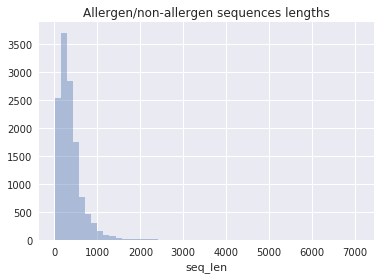

In [13]:
fig = plt.figure()
ax = sns.distplot(df.seq_len, norm_hist=False, kde=False)
ax.set_title('Allergen/non-allergen sequences lengths')
fig.savefig('../misc/meetings/next_meeting/figures/allegens_non_allergens_lengths.png')

# Studies of Genre and species of input data

One trap our dataset could have is allergens and non allergens proteins data have strong structural difference.
Thus, it could be such properties and not the allergenic characteristic that could be predicted by our classifiers.

For that purpose, we first check that our data is balanced in terms of protein origin, i.e. that for a same Genre/species, we can find allergens *and* non allergens.

Following cell provides a table of counts of examples for each Genre that appears in allergens/non-allergens

In [4]:
gped = df.groupby(['is_allergenic', 'genre']).genre.count()
res = gped.unstack().dropna(axis=1)
display(res.T)
print('Nb examples in dataset for which we have simultaneously allergenic and non allergenic proteins from same Genre : {} / {}'.format(res.sum().sum(), len(df)))

is_allergenic,False,True
genre,,
actinidia,36.0,29.0
arachis,29.0,42.0
bos,6015.0,26.0
charybdis,3.0,1.0
chionoecetes,10.0,1.0
eriocheir,2.0,1.0
fagopyrum,50.0,11.0
farfantepenaeus,1.0,1.0
fenneropenaeus,7.0,4.0


Nb examples in dataset for which we have simultaneously allergenic and non allergenic proteins from same Genre : 10595.0 / 12851


Following cell provides a table of counts of examples for each Species that appears in allergens/non-allergens

In [29]:
gped = df.groupby(['is_allergenic', 'genre', 'species']).genre.count()
res = gped.unstack(level=[1,2]).dropna(axis=1)
display(res.T)
print('Nb examples in dataset for which we have simultaneously allergenic and non allergenic proteins from same Species : {} / {}'.format(res.sum().sum(), len(df)))

is_allergenic                    False  True 
genre          species                       
actinidia      chinensis          13.0    6.0
               deliciosa          23.0   17.0
arachis        hypogaea           29.0   42.0
bos            taurus           6015.0   25.0
chionoecetes   opilio             10.0    1.0
eriocheir      sinensis            2.0    1.0
fagopyrum      esculentum         48.0    8.0
               tataricum           2.0    3.0
fenneropenaeus merguiensis         5.0    2.0
gallus         gallus           2300.0   16.0
glycine        max               404.0   41.0
litopenaeus    vannamei           28.0    4.0
macrobrachium  rosenbergii         9.0    2.0
marsupenaeus   japonicus           9.0    1.0
metapenaeus    ensis               4.0    1.0
oncorhynchus   keta               32.0    1.0
pandalus       borealis            4.0    1.0
paralithodes   camtschaticus       4.0    2.0
penaeus        monodon            31.0    5.0
portunus       trituberculatus     1.0    1.0
salmo          salar             160.0    7.0
scylla         serrata             6.0    1.0
staphylococcus aureus            643.0    5.0
triticum       aestivum          378.0   89.0

Nb examples in dataset for which we have simultaneously allergenic and non allergenic proteins from same Species : 10442.0 / 12851


# Comparison with SDAP data

In [5]:
sdap_data = '/home/pierre/riken/data/sdap/sdap_allergens.csv'
sdap_df = pd.read_csv(sdap_data)

In [16]:
sdap_df.head()

,allergen_name,scientific_name,common_name,allergen_type,description,class_type,url,sequences,is_allergenic,genre,species
0,Aca s 13,Acarus siro,mite,mites,fatty acid binding protein,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MVQINGSYKLEKSDNFDAFLKELGLNFVTRNLAKSATPTVEVSVNG...,True,acarus,siro
1,Act c 5.0101,Actinidia chinensis,Gold Kiwi fruit,foods,Kiwellin,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,ISSCNGPCRDLNDCDGQLICGTTHSHQPGGCKPS,True,actinidia,chinensis
2,Act c 8.0101,Actinidia chinensis,Gold Kiwi fruit,foods,Pathogenesis-related protein PR-10,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MGVVTYDMEIPSKVPPVKLYKAFILDGDTLVPKVLPHAIKCVKILE...,True,actinidia,chinensis
3,Act d 1,Actinidia deliciosa,Kiwi fruit,foods,Cysteine protease; EC 3.4.22.14; Old Name: Act...,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MGLPKSFVSMSLLFFSTLLILSLAFNAKNLTQRTNDEVKAMYESWL...,True,actinidia,deliciosa
4,Act d 2,Actinidia deliciosa,Kiwi fruit,foods,Thaumatin-like protein; Old Name: Act c 2,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MSTFKSLSLSALLFIAFLFTCARGATFNIINNCPFTVWAAAVPGGG...,True,actinidia,deliciosa


In [7]:
sdap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 11 columns):
allergen_name      987 non-null object
scientific_name    987 non-null object
common_name        889 non-null object
allergen_type      987 non-null object
description        987 non-null object
class_type         987 non-null object
url                987 non-null object
sequences          987 non-null object
is_allergenic      987 non-null bool
genre              987 non-null object
species            987 non-null object
dtypes: bool(1), object(10)
memory usage: 78.2+ KB


In [12]:
join = pd.merge(df, sdap_df, on='sequences')
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 15 columns):
is_allergenic_x    827 non-null bool
sequences          827 non-null object
genre_x            826 non-null object
species_x          825 non-null object
seq_len            827 non-null int64
allergen_name      827 non-null object
scientific_name    827 non-null object
common_name        753 non-null object
allergen_type      827 non-null object
description        827 non-null object
class_type         827 non-null object
url                827 non-null object
is_allergenic_y    827 non-null bool
genre_y            827 non-null object
species_y          827 non-null object
dtypes: bool(2), int64(1), object(12)
memory usage: 92.1+ KB


Unfortunately many items of SDAP already are in our dataset ...

In [17]:
known_sequences = join.sequences.unique()
new_seq = sdap_df[~sdap_df.sequences.isin(known_sequences)]

In [18]:
new_seq

,allergen_name,scientific_name,common_name,allergen_type,description,class_type,url,sequences,is_allergenic,genre,species
5,Act d 3.0101,Actinidia deliciosa,Kiwi fruit,foods,Unknown Function,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,FTDGLMKNGNFELAPKPEDMGTVRVESLKAVKYXD,True,actinidia,deliciosa
13,Aed a 2,Aedes aegyptii,mosquito,insects,N,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MKLLLLLAIFTTFSVVASMGPFDPEEMLFIFTRCMEDNLEDGANRL...,True,aedes,aegyptii
15,Aln g 1,Alnus glutinosa,alder,tree Fagales,homolog: pathogenesis related protein PR10,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,GVFNYEAETPSVIPAARLFKAFILDGDKLLPKVAPEAVSSVENIEG...,True,alnus,glutinosa
18,Alt a 10,Alternaria alternata,NaN,fungi (moulds) Ascomycota Dothidiales,aldehyde dehydrogenase: ALDDH; EC 1.2.1.3,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MTSVKLSTPQTGEFEQPTGLFINNEFVKAVDGKTFDVINPSTEEVI...,True,alternaria,alternata
21,Alt a 2,Alternaria alternata,NaN,fungi (moulds) Ascomycota Dothidiales,N,non-IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MHSSNNFFKDNIFRSLSKEDPDYSRNIEGQVIRLHWDWAQLLMLSA...,True,alternaria,alternata
23,Alt a 4,Alternaria alternata,NaN,fungi (moulds) Ascomycota Dothidiales,protein disulfideisomerase,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MTKQALPAVSEVTKDTLEEFKTADKVVLVAYFAADDKASNETFTSV...,True,alternaria,alternata
52,Ani s 6.0101,Anisakis simplex,nematode,others,Serine protease inhibitor,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MFQSTFFLVLMVCVATARFANKDHCPPNEEYNECGNPCQEKCDNGE...,True,anisakis,simplex
62,Api g 3,Apium graveolens,celery,foods,Chlorophyll a-b binding protein,non-IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MAASTMALSSPALAGKAVKVAPSSSELFGNGRVSMRKTVKAPVSDS...,True,apium,graveolens
65,Api m 1,Apis mellifera,honey bee,insects,phospholipase A2; Phosphatidylcholine 2-acylhy...,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,GSLFLLLLSTSHGWQIRDRIGDNELEERIIYPGTLWCGHGNKSSGP...,True,apis,mellifera
75,Api m 7,Apis mellifera,honey bee,insects,CUB serine protease; Bee venom,IUIS,http://fermi.utmb.edu/cgi-bin/SDAP/sdap_02?dB_...,MIFTNNIAAFQNVVLVKKVKIVLLIFYGSIMFSMTQVNKEECDYYQ...,True,apis,mellifera


In [19]:
new_seq.to_csv('/home/pierre/riken/data/sdap/distinct_sdap_allergens.csv', index=False, sep=',')

# PFAM Data

In [3]:
pfam_file = '/home/pierre/riken/data/pfam/Pfam-A.fasta'
pfam_df = reader.read_fasta(pfam_file)
info = pfam_df.description.str.split(r'\s|;', expand=True) \
    .iloc[:, 0:4] \
    .rename(columns={0:'protein_loc', 1: 'protein_tag', 2: 'family', 3:'family_name'})
pfam_df = pfam_df.drop(columns=['description', 'id', 'name'])
pfam_df = pd.concat([pfam_df, info], axis=1, ignore_index=False)
pfam_df.loc[:, 'family'] = pfam_df.family.str.split('.', expand=True).iloc[:, 0]

clans_families_path = '/home/pierre/riken/data/pfam/Pfam-A.clans.tsv'
family_clans = pd.read_csv(clans_families_path, sep='\t', 
                           names=['family', 'clan', 'clan_name', 'family_name', 'family_description'])

pfam_df = pd.merge(left=pfam_df, right=family_clans, on='family', how='left')

In [4]:
pfam_df.clan.unique().shape

(605,)

In [5]:
pfam_df.clan.isnull().sum()

5832160

In [7]:
pfam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21827419 entries, 0 to 21827418
Data columns (total 9 columns):
sequences             object
protein_loc           object
protein_tag           object
family                object
family_name_x         object
clan                  object
clan_name             object
family_name_y         object
family_description    object
dtypes: object(9)
memory usage: 1.6+ GB


In [8]:
pfam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21827419 entries, 0 to 21827418
Data columns (total 9 columns):
sequences             object
protein_loc           object
protein_tag           object
family                object
family_name_x         object
clan                  object
clan_name             object
family_name_y         object
family_description    object
dtypes: object(9)
memory usage: 1.6+ GB


In [30]:
pfam_df.groupby('clan').size().sort_values(ascending=False)

clan
CL0023    1086591
CL0063     969876
CL0123     741987
CL0020     470974
CL0186     377514
CL0015     264046
CL0036     252649
CL0016     227318
CL0028     225688
CL0025     222380
CL0177     208324
CL0159     184341
CL0039     162366
CL0113     161492
CL0361     154219
CL0022     152695
CL0029     151786
CL0304     150309
CL0404     148603
CL0021     145563
CL0465     144552
CL0172     140883
CL0061     138364
CL0110     133845
CL0257     129574
CL0105     128683
CL0219     120341
CL0058     118022
CL0137     117244
CL0108     110483
           ...   
CL0621        211
CL0249        205
CL0571        195
CL0618        194
CL0420        189
CL0055        156
CL0606        148
CL0586        147
CL0563        139
CL0074        129
CL0400        111
CL0605         88
CL0446         67
CL0284         62
CL0371         47
CL0640         43
CL0386         42
CL0611         38
CL0628         38
CL0658         36
CL0653         21
CL0096         19
CL0146         12
CL0156         11
CL032

# SwissProt import

In [9]:
filename = '/home/pierre/riken/data/swiss/uniprot-reviewed%3Ayes.fasta'
df = reader.read_fasta(filename)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557713 entries, 0 to 557712
Data columns (total 4 columns):
description    557713 non-null object
id             557713 non-null object
name           557713 non-null object
sequences      557713 non-null object
dtypes: object(4)
memory usage: 17.0+ MB
None


In [16]:
df.loc[:, 'protein_tag'] = df.id.str.split('|',expand=True).loc[:, 1]

In [17]:
df.head()

,description,id,name,sequences,protein_tag
0,sp|P0C7Y4|PSMA1_STAAC Phenol-soluble modulin a...,sp|P0C7Y4|PSMA1_STAAC,sp|P0C7Y4|PSMA1_STAAC,"(M, G, I, I, A, G, I, I, K, V, I, K, S, L, I, ...",P0C7Y4
1,sp|P52212|PTHY_CANLF Parathyroid hormone OS=Ca...,sp|P52212|PTHY_CANLF,sp|P52212|PTHY_CANLF,"(M, M, S, A, K, D, M, V, K, V, M, I, V, M, F, ...",P52212
2,sp|P15743|PTHY_CHICK Parathyroid hormone OS=Ga...,sp|P15743|PTHY_CHICK,sp|P15743|PTHY_CHICK,"(M, T, S, T, K, N, L, A, K, A, I, V, I, L, Y, ...",P15743
3,sp|P01269|PTHY_PIG Parathyroid hormone OS=Sus ...,sp|P01269|PTHY_PIG,sp|P01269|PTHY_PIG,"(M, M, S, A, K, D, T, V, K, V, M, V, V, M, L, ...",P01269
4,sp|Q98936|PTPRG_CHICK Receptor-type tyrosine-p...,sp|Q98936|PTPRG_CHICK,sp|Q98936|PTPRG_CHICK,"(M, R, R, L, L, Q, P, C, W, W, I, F, F, L, K, ...",Q98936


# Merging SwissProt / PFAM info

In [13]:
pfam_df = pfam_df.dropna()
pfam_df.loc[:, 'protein_concice_tag'] = pfam_df.protein_tag.str.split('.', expand=True).loc[:, 0]
pfam_df.head()

,sequences,protein_loc,protein_tag,family,family_name_x,clan,clan_name,family_name_y,family_description
4074,"(S, I, S, F, P, L, G, S, L, V, G, D, D, V, A, ...",A0A0K2DEK0_9RHIZ/27-145,A0A0K2DEK0.1,PF16998,17kDa_Anti_2,CL0500,Glycine-zipper,17kDa_Anti_2,17 kDa outer membrane surface antigen
4075,"(K, G, F, S, I, E, K, A, V, P, D, S, T, T, I, ...",A0A135I1Z8_9RHIZ/2-118,A0A135I1Z8.1,PF16998,17kDa_Anti_2,CL0500,Glycine-zipper,17kDa_Anti_2,17 kDa outer membrane surface antigen
4076,"(G, S, R, L, G, E, A, H, Y, Q, G, D, D, T, R, ...",A0A0D2VNJ7_9PROT/27-119,A0A0D2VNJ7.1,PF16998,17kDa_Anti_2,CL0500,Glycine-zipper,17kDa_Anti_2,17 kDa outer membrane surface antigen
4077,"(A, C, A, T, Q, P, A, A, P, L, Y, H, Q, M, D, ...",A0KMQ9_AERHH/15-112,A0KMQ9.1,PF16998,17kDa_Anti_2,CL0500,Glycine-zipper,17kDa_Anti_2,17 kDa outer membrane surface antigen
4078,"(S, F, S, F, G, T, V, G, L, Q, E, K, E, P, Q, ...",A0A0H1R5P8_9RHIZ/34-151,A0A0H1R5P8.1,PF16998,17kDa_Anti_2,CL0500,Glycine-zipper,17kDa_Anti_2,17 kDa outer membrane surface antigen


In [20]:
merged = pd.merge(left=df, right=pfam_df, left_on='protein_tag', right_on='protein_concice_tag', how='left')

In [21]:
merged.head()

,description,id,name,sequences_x,protein_tag_x,sequences_y,protein_loc,protein_tag_y,family,family_name_x,clan,clan_name,family_name_y,family_description,protein_concice_tag
0,sp|P0C7Y4|PSMA1_STAAC Phenol-soluble modulin a...,sp|P0C7Y4|PSMA1_STAAC,sp|P0C7Y4|PSMA1_STAAC,"(M, G, I, I, A, G, I, I, K, V, I, K, S, L, I, ...",P0C7Y4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sp|P52212|PTHY_CANLF Parathyroid hormone OS=Ca...,sp|P52212|PTHY_CANLF,sp|P52212|PTHY_CANLF,"(M, M, S, A, K, D, M, V, K, V, M, I, V, M, F, ...",P52212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sp|P15743|PTHY_CHICK Parathyroid hormone OS=Ga...,sp|P15743|PTHY_CHICK,sp|P15743|PTHY_CHICK,"(M, T, S, T, K, N, L, A, K, A, I, V, I, L, Y, ...",P15743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sp|P01269|PTHY_PIG Parathyroid hormone OS=Sus ...,sp|P01269|PTHY_PIG,sp|P01269|PTHY_PIG,"(M, M, S, A, K, D, T, V, K, V, M, V, V, M, L, ...",P01269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sp|Q98936|PTPRG_CHICK Receptor-type tyrosine-p...,sp|Q98936|PTPRG_CHICK,sp|Q98936|PTPRG_CHICK,"(M, R, R, L, L, Q, P, C, W, W, I, F, F, L, K, ...",Q98936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
merged_df = merged[~merged.clan.isnull()]

In [28]:
merged_df.groupby('clan').size().sort_values(ascending=False)

clan
CL0023    14575
CL0063    11258
CL0036     6149
CL0039     5672
CL0021     4407
CL0020     3611
CL0186     3285
CL0123     3241
CL0040     2796
CL0329     2482
CL0061     2144
CL0108     1846
CL0167     1846
CL0258     1668
CL0113     1661
CL0536     1652
CL0016     1535
CL0198     1503
CL0110     1441
CL0575     1411
CL0014     1409
CL0022     1320
CL0011     1311
CL0159     1253
CL0649     1231
CL0361     1141
CL0219     1139
CL0465     1096
CL0458     1067
CL0533     1056
          ...  
CL0252        4
CL0643        4
CL0386        3
CL0217        3
CL0488        3
CL0563        3
CL0096        3
CL0620        3
CL0631        3
CL0577        3
CL0421        2
CL0447        2
CL0326        2
CL0590        2
CL0586        2
CL0535        2
CL0400        2
CL0626        2
CL0249        2
CL0285        2
CL0481        2
CL0069        2
CL0564        2
CL0628        1
CL0490        1
CL0345        1
CL0471        1
CL0446        1
CL0284        1
CL0420        1
Length: 590, dtype:

In [29]:
merged_df.to_csv('/home/pierre/riken/data/swiss/swiss_with_clans.tsv', sep='\t', index=False)